# EDA for Group 2 stations

In [72]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('ggplot')

import missingno

Dataset: https://www.notion.so/Exploratory-Data-Analysis-EDA-7ced94927f7f473bad7a651d24828285?pvs=4#b6be005c2b2640c0b89903023b28288b (CPCB dataset with AQI column)

In [74]:
directory = "/Users/rnirms/Documents/omdena/data/CPCB_downloads/2023-03-07/csv_aqi/"
all_files = os.listdir(directory)
csv_files = [file for file in all_files if file.endswith(".csv")]
csv_files = sorted(csv_files)
print(csv_files)

['BandraKurlaComplexMumbaiIITM.csv', 'BandraMumbaiMPCB.csv', 'BorivaliEastMumbaiIITM.csv', 'BorivaliEastMumbaiMPCB.csv', 'ChakalaAndheriEastMumbaiIITM.csv', 'ChhatrapatiShivajiIntlAirportT2MumbaiMPCB.csv', 'ColabaMumbaiMPCB.csv', 'DeonarMumbaiIITM.csv', 'KandivaliEastMumbaiMPCB.csv', 'KhindipadaBhandupWestMumbaiIITM.csv', 'KurlaMumbaiMPCB.csv', 'MaladWestMumbaiIITM.csv', 'MazgaonMumbaiIITM.csv', 'MulundWestMumbaiMPCB.csv', 'NavyNagarColabaMumbaiIITM.csv', 'PowaiMumbaiMPCB.csv', 'SiddharthNagarWorliMumbaiIITM.csv', 'SionMumbaiMPCB.csv', 'VasaiWestMumbaiMPCB.csv', 'VileParleWestMumbaiMPCB.csv', 'WorliMumbaiMPCB.csv']


### Load dataset

In [17]:
df_list = []
station_names = []
for filename in csv_files: 
    print(f'Loading {filename}')
    df_temp = pd.read_csv(os.path.join(directory, filename), index_col=0)
    df_list.append(df_temp)
    name, _ = os.path.splitext(filename)
    station_names.append(name)

data_dict = dict(zip(station_names, df_list))

Loading BandraKurlaComplexMumbaiIITM.csv
Loading BandraMumbaiMPCB.csv
Loading BorivaliEastMumbaiIITM.csv


/var/folders/z_/xjjzg8h12q11z37t52h5ps3m0000gn/T/ipykernel_89474/3893753908.py:5: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(os.path.join(directory, filename), index_col=0)


Loading BorivaliEastMumbaiMPCB.csv
Loading ChakalaAndheriEastMumbaiIITM.csv
Loading ChhatrapatiShivajiIntlAirportT2MumbaiMPCB.csv
Loading ColabaMumbaiMPCB.csv
Loading DeonarMumbaiIITM.csv
Loading KandivaliEastMumbaiMPCB.csv
Loading KhindipadaBhandupWestMumbaiIITM.csv
Loading KurlaMumbaiMPCB.csv
Loading MaladWestMumbaiIITM.csv
Loading MazgaonMumbaiIITM.csv
Loading MulundWestMumbaiMPCB.csv
Loading NavyNagarColabaMumbaiIITM.csv
Loading PowaiMumbaiMPCB.csv
Loading SiddharthNagarWorliMumbaiIITM.csv
Loading SionMumbaiMPCB.csv
Loading VasaiWestMumbaiMPCB.csv
Loading VileParleWestMumbaiMPCB.csv
Loading WorliMumbaiMPCB.csv


### Clean data

In [30]:
def clean_data(data):
    data["Date"] = pd.to_datetime(data.Date, format='%Y-%m-%d %H:%M:%S') # Format Date column as datetime
    return data 


In [31]:
for key in data_dict.keys():
    data_dict[key] = clean_data(data_dict[key])

## Deonar

In [33]:
df = data_dict['DeonarMumbaiIITM']

<Axes: >

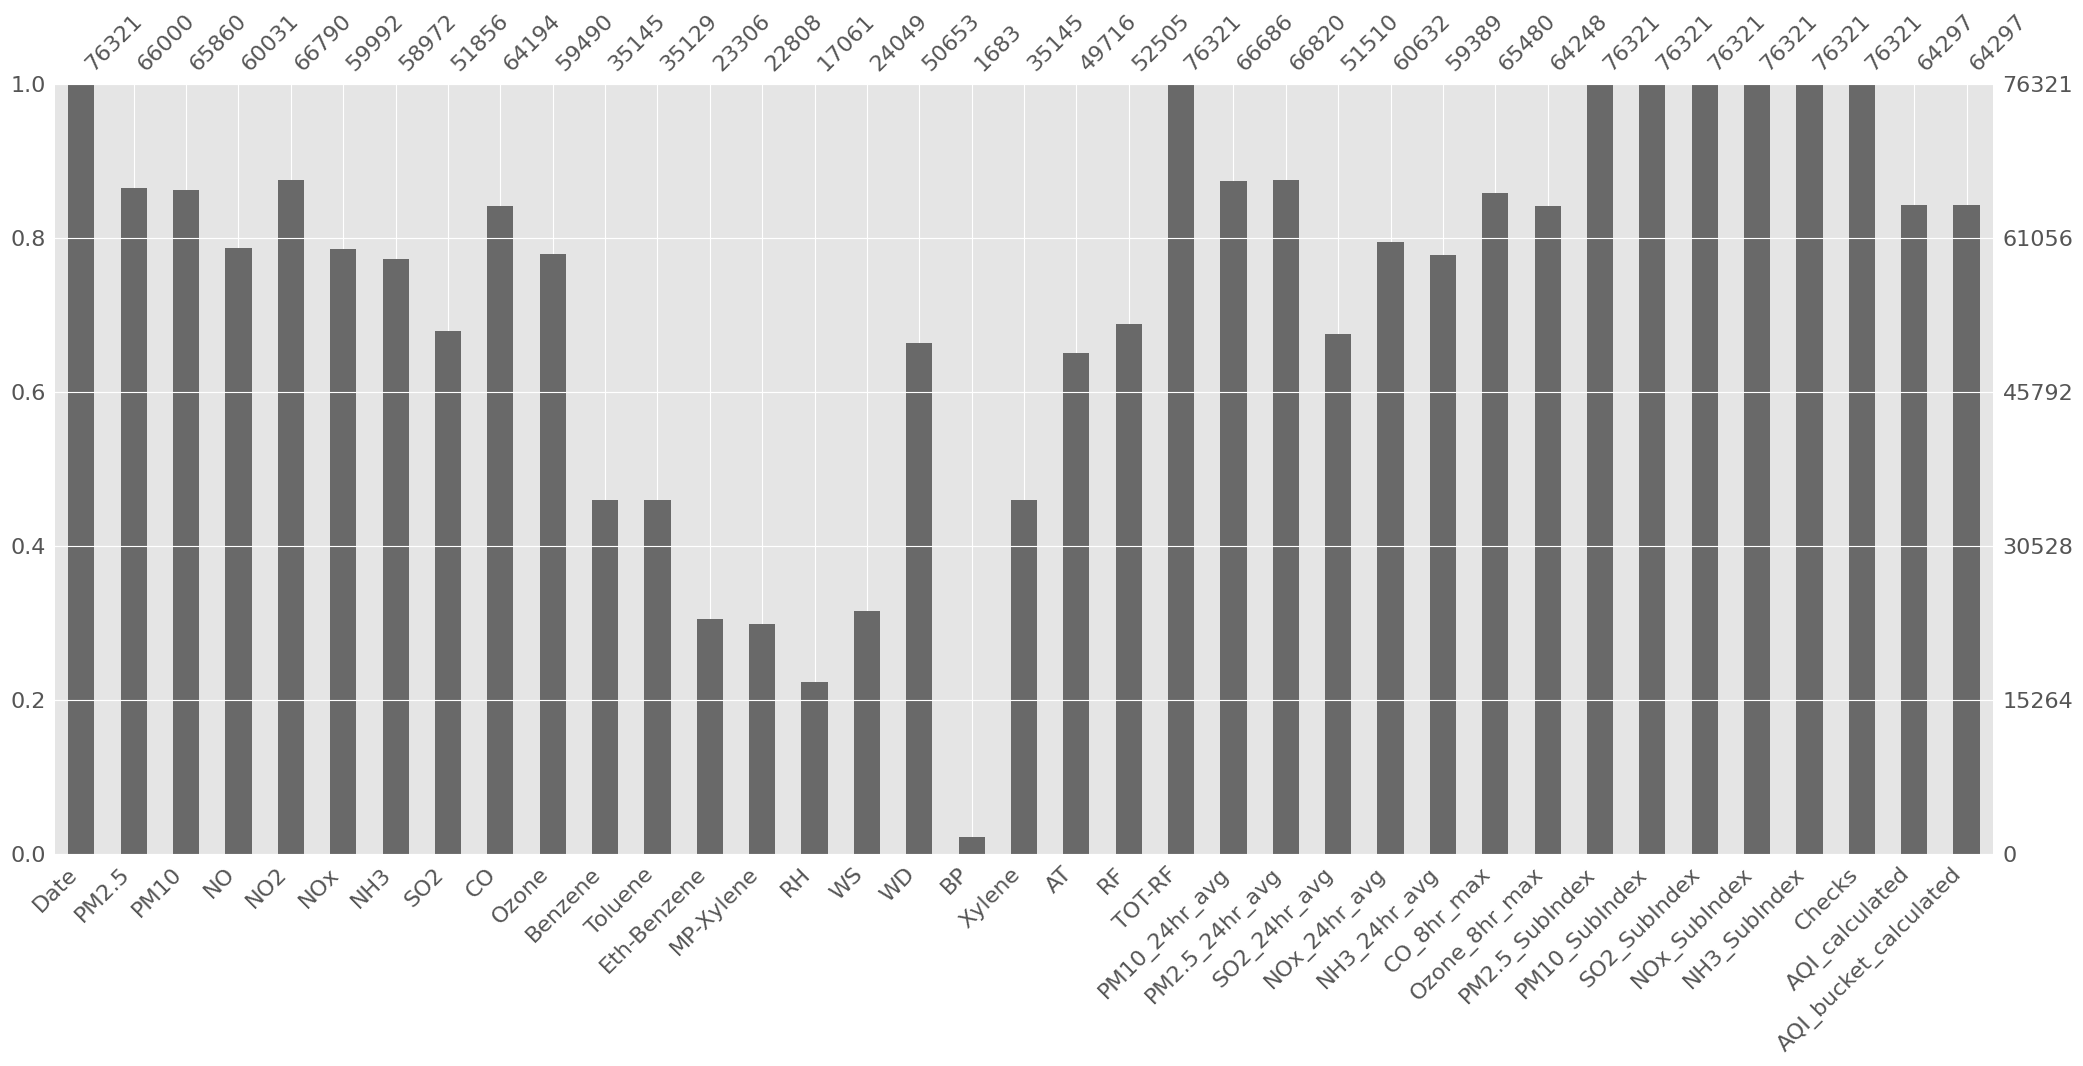

In [75]:
missingno.bar(df)

Observations: 
1. AQI Pollutants: all at around 70% and above. 
2. Other pollutants: less data 
3. Weather: less data 

<Axes: >

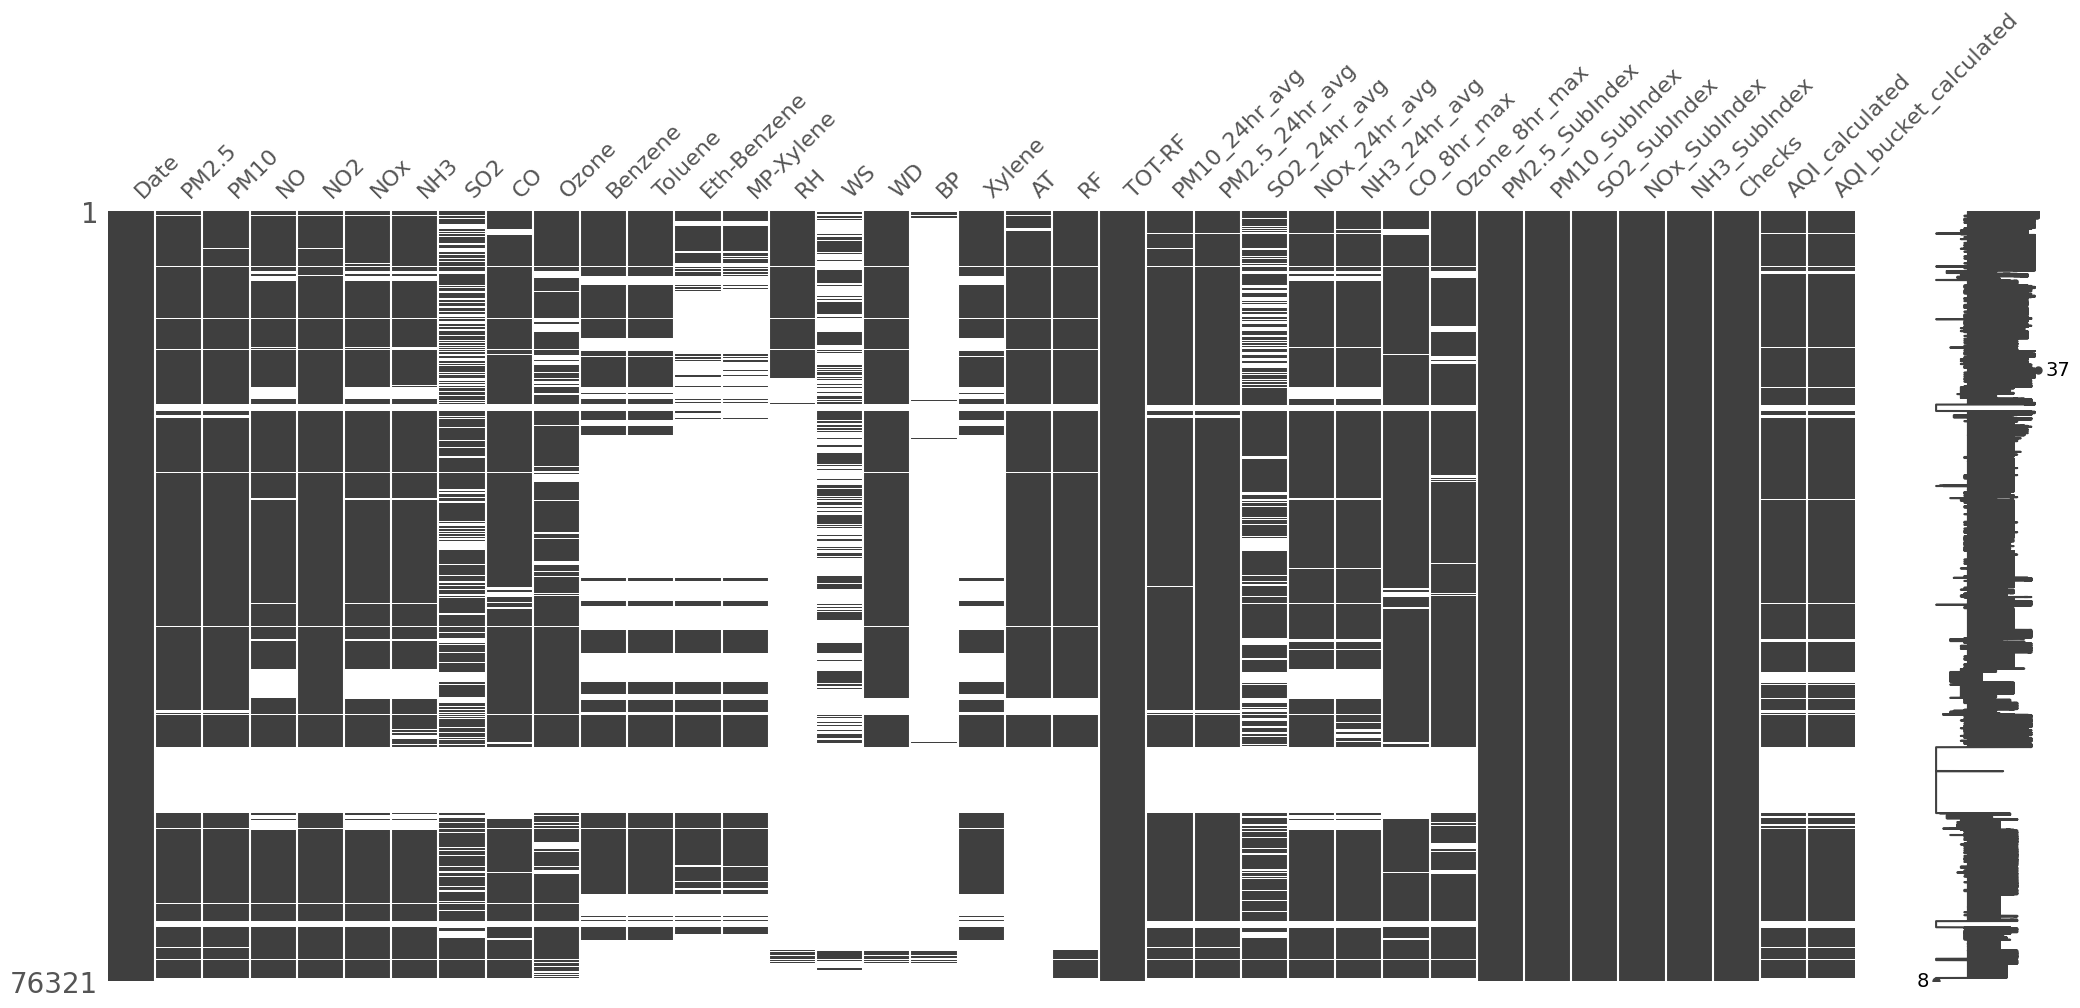

In [76]:
missingno.matrix(df)

Observations:
1. Short sequences of missing values in a column - NOx, Benzene etc - maybe simple imputation will be good enough.
2. Long sequences of missing values in a column - may need more sophisticated imputation
    * PM2.5, PM10, Ozone - one off - affects AQI calculations for that period!
    * SR - long chunks but is regular
    * BP - available recently

<Axes: xlabel='Date'>

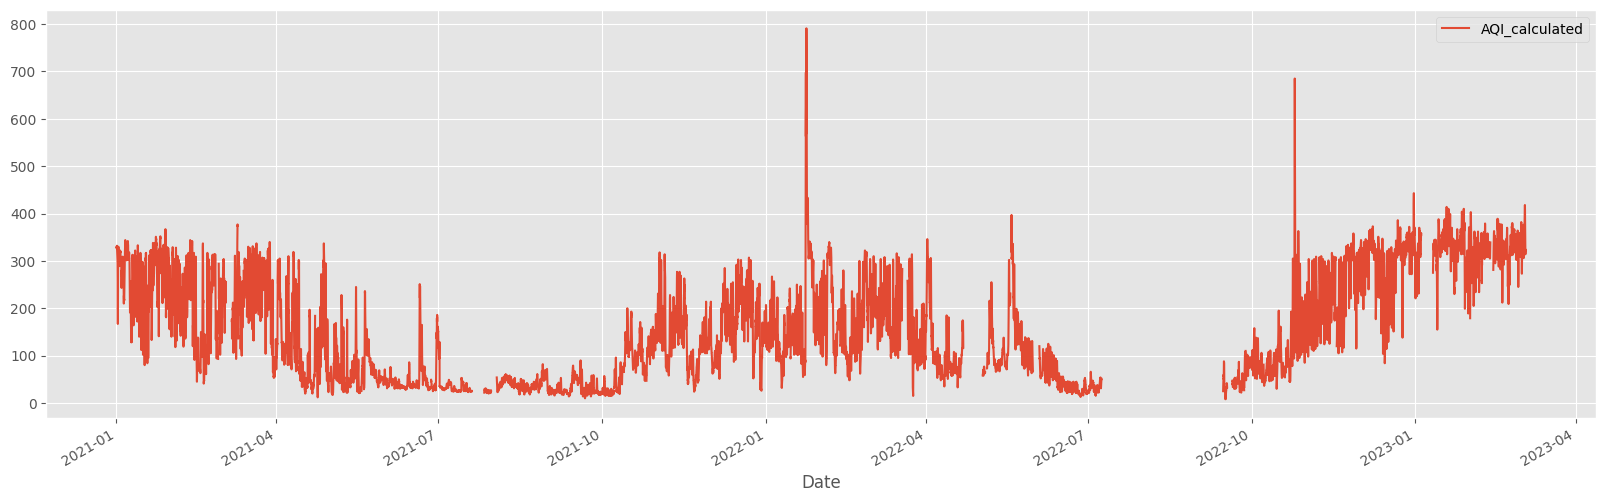

In [77]:
plt.rcParams['figure.figsize']=(20,6)
df[['Date', 'AQI_calculated']].set_index('Date').plot()

Seasonal change of AQI is seen in this station.

Q: how do we deal with missing data for a few weeks?

## Kandivali East Mumbai MPCB

In [78]:
df = data_dict['KandivaliEastMumbaiMPCB']

<Axes: >

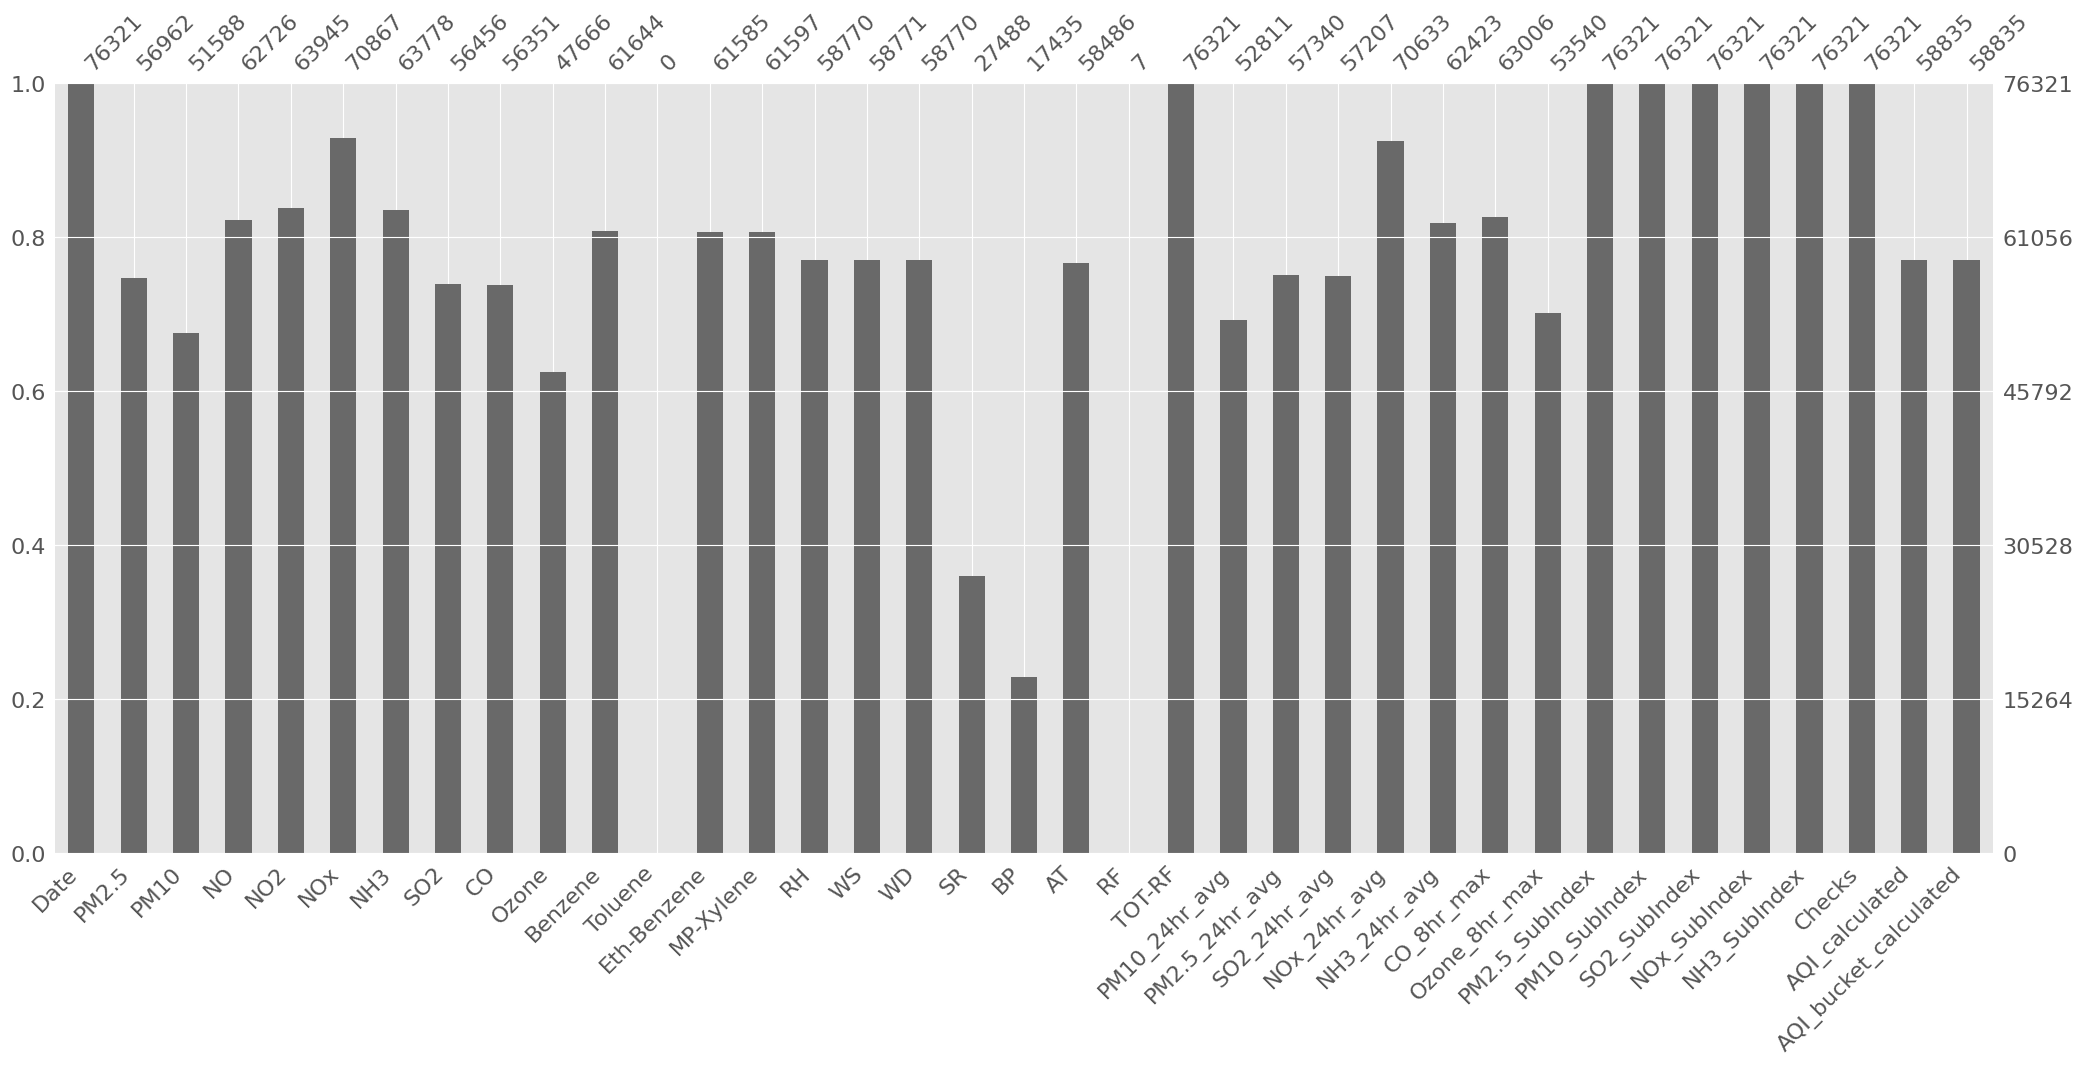

In [79]:
missingno.bar(df)

<Axes: >

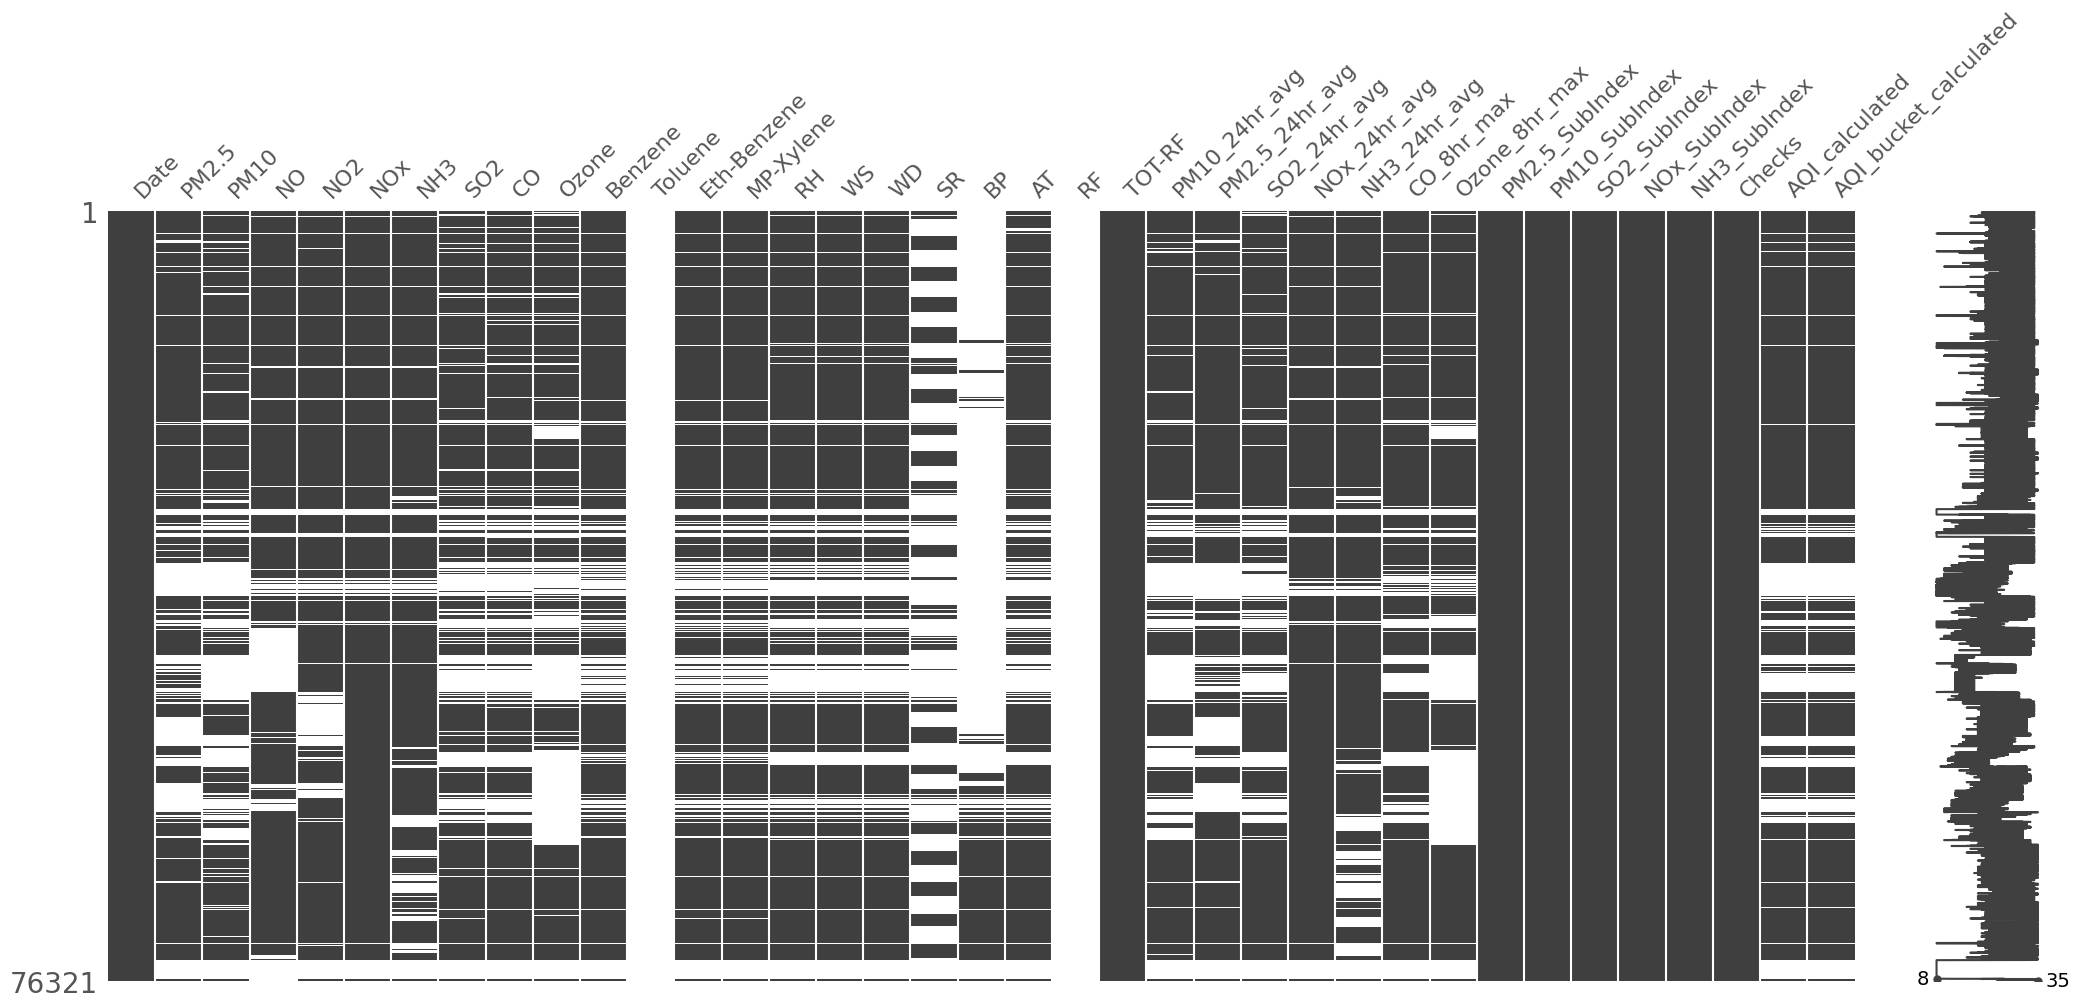

In [80]:
missingno.matrix(df)

<Axes: xlabel='Date'>

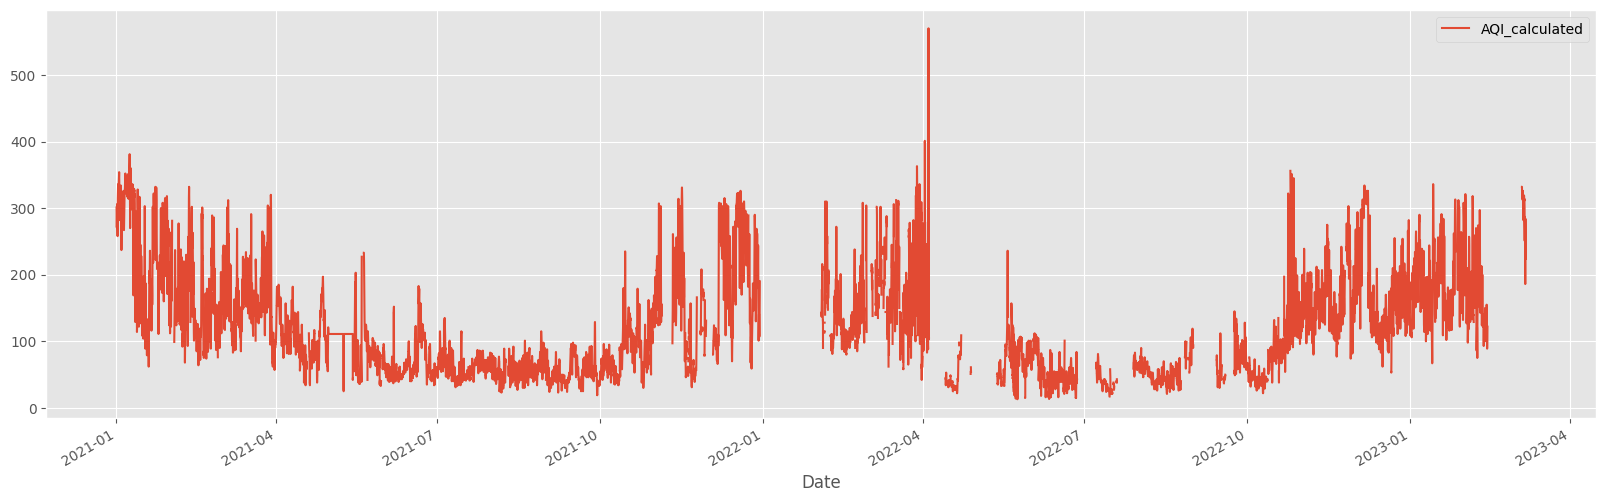

In [81]:
df[['Date', 'AQI_calculated']].set_index('Date').plot()

Seasonal change of AQI is seen in this station. 

## Khindipada Bhandup West Mumbai IITM

In [82]:
df = data_dict['KhindipadaBhandupWestMumbaiIITM']

<Axes: >

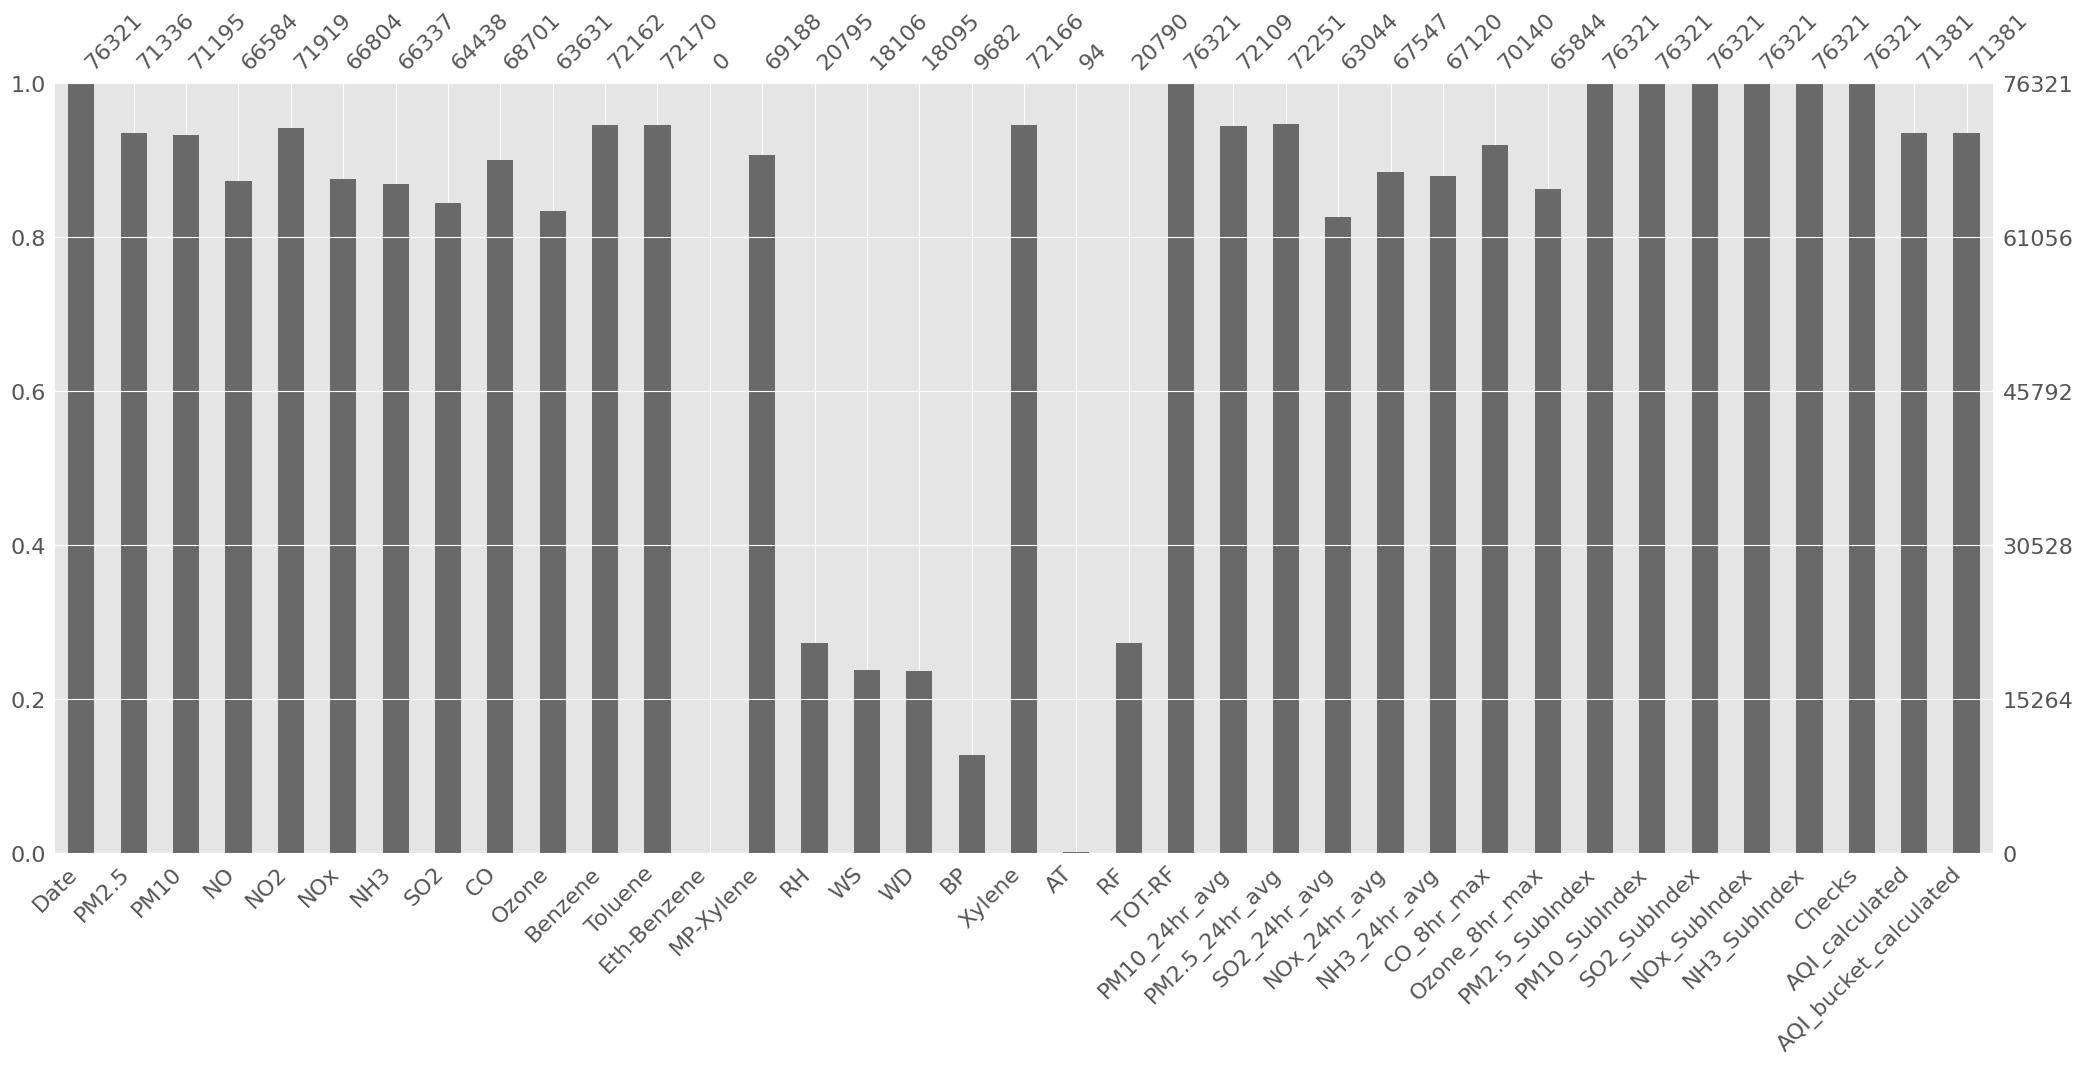

In [83]:
missingno.bar(df)

<Axes: >

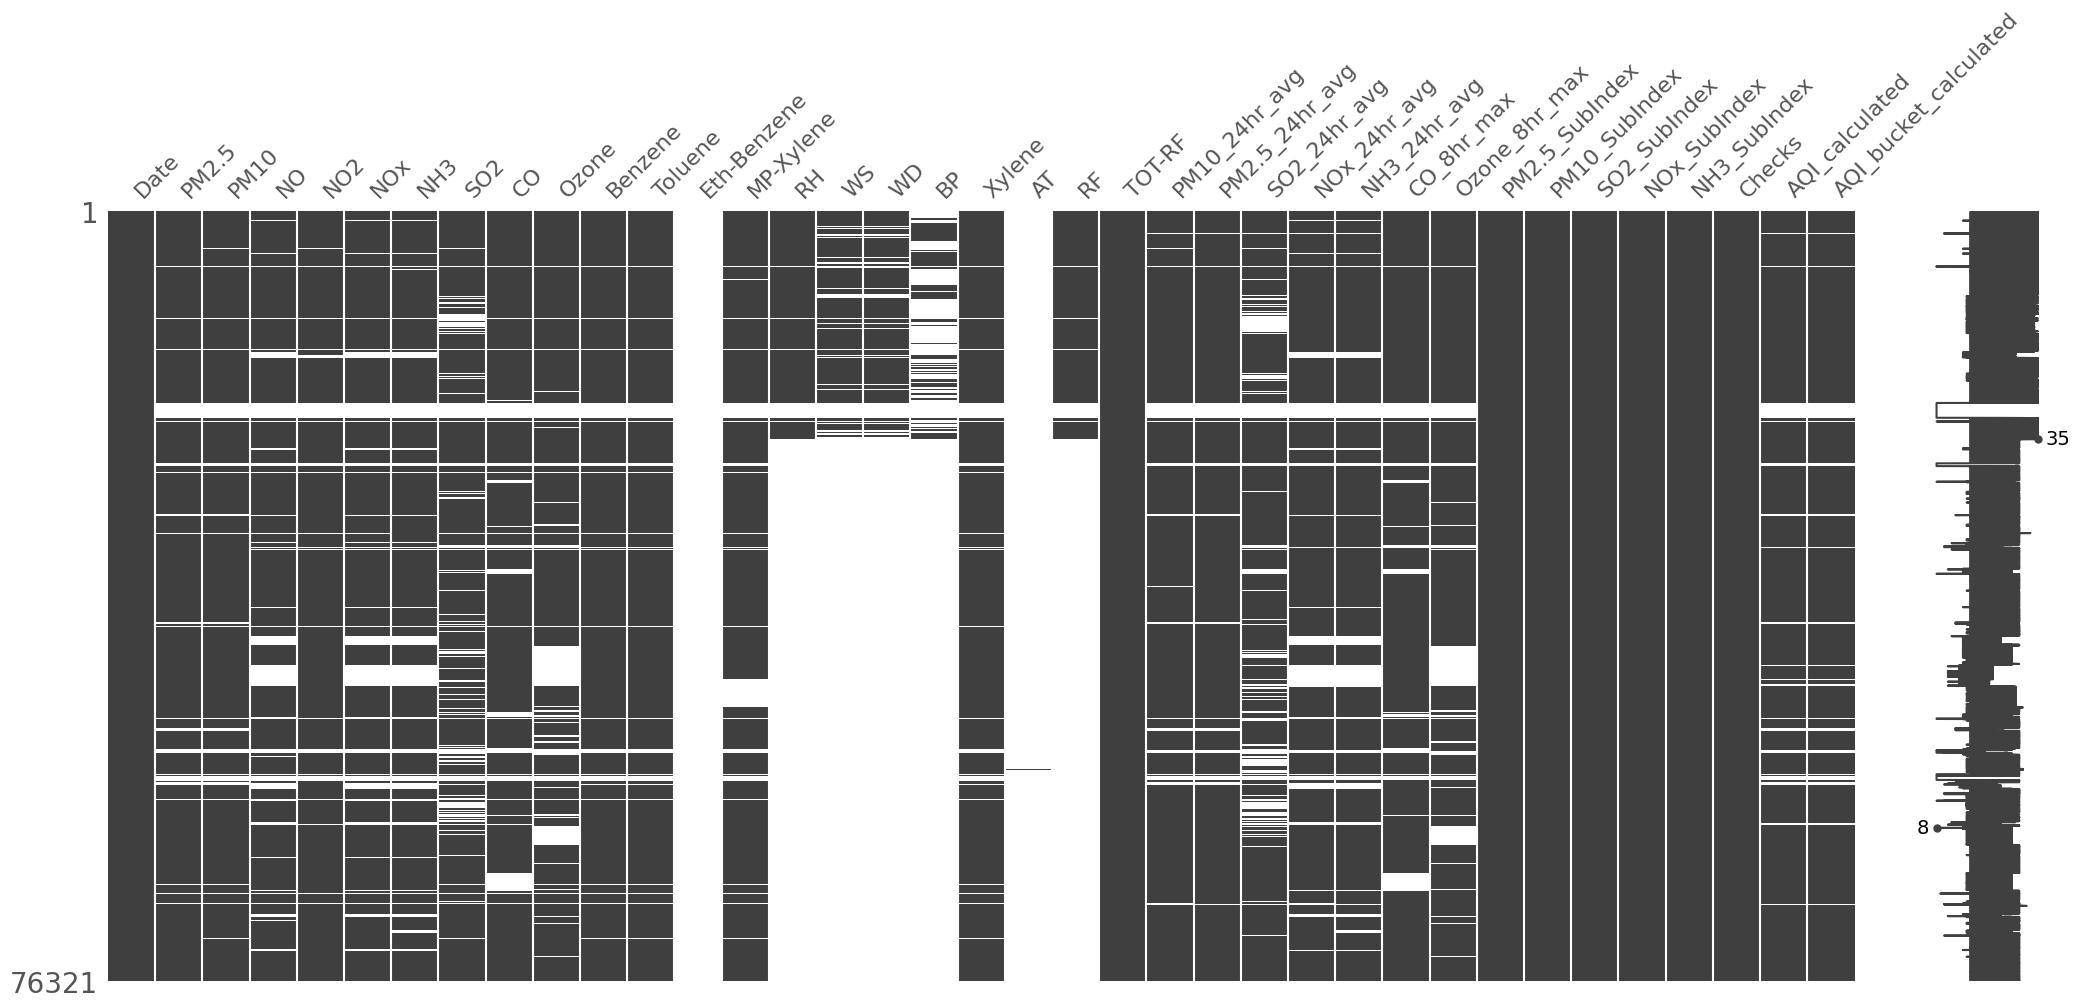

In [84]:
missingno.matrix(df)

<Axes: xlabel='Date'>

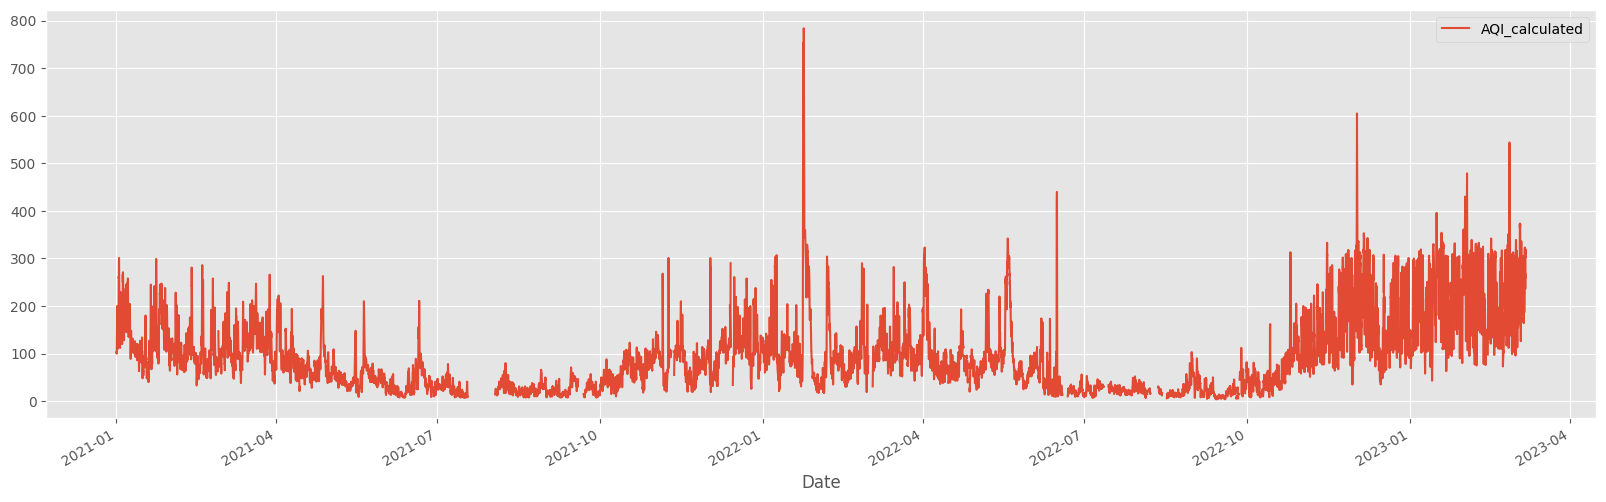

In [85]:
df[['Date', 'AQI_calculated']].set_index('Date').plot()

Recent months look very different from last season. Why?

## Kurla Mumbai MPCB

In [86]:
df = data_dict['KurlaMumbaiMPCB']

<Axes: >

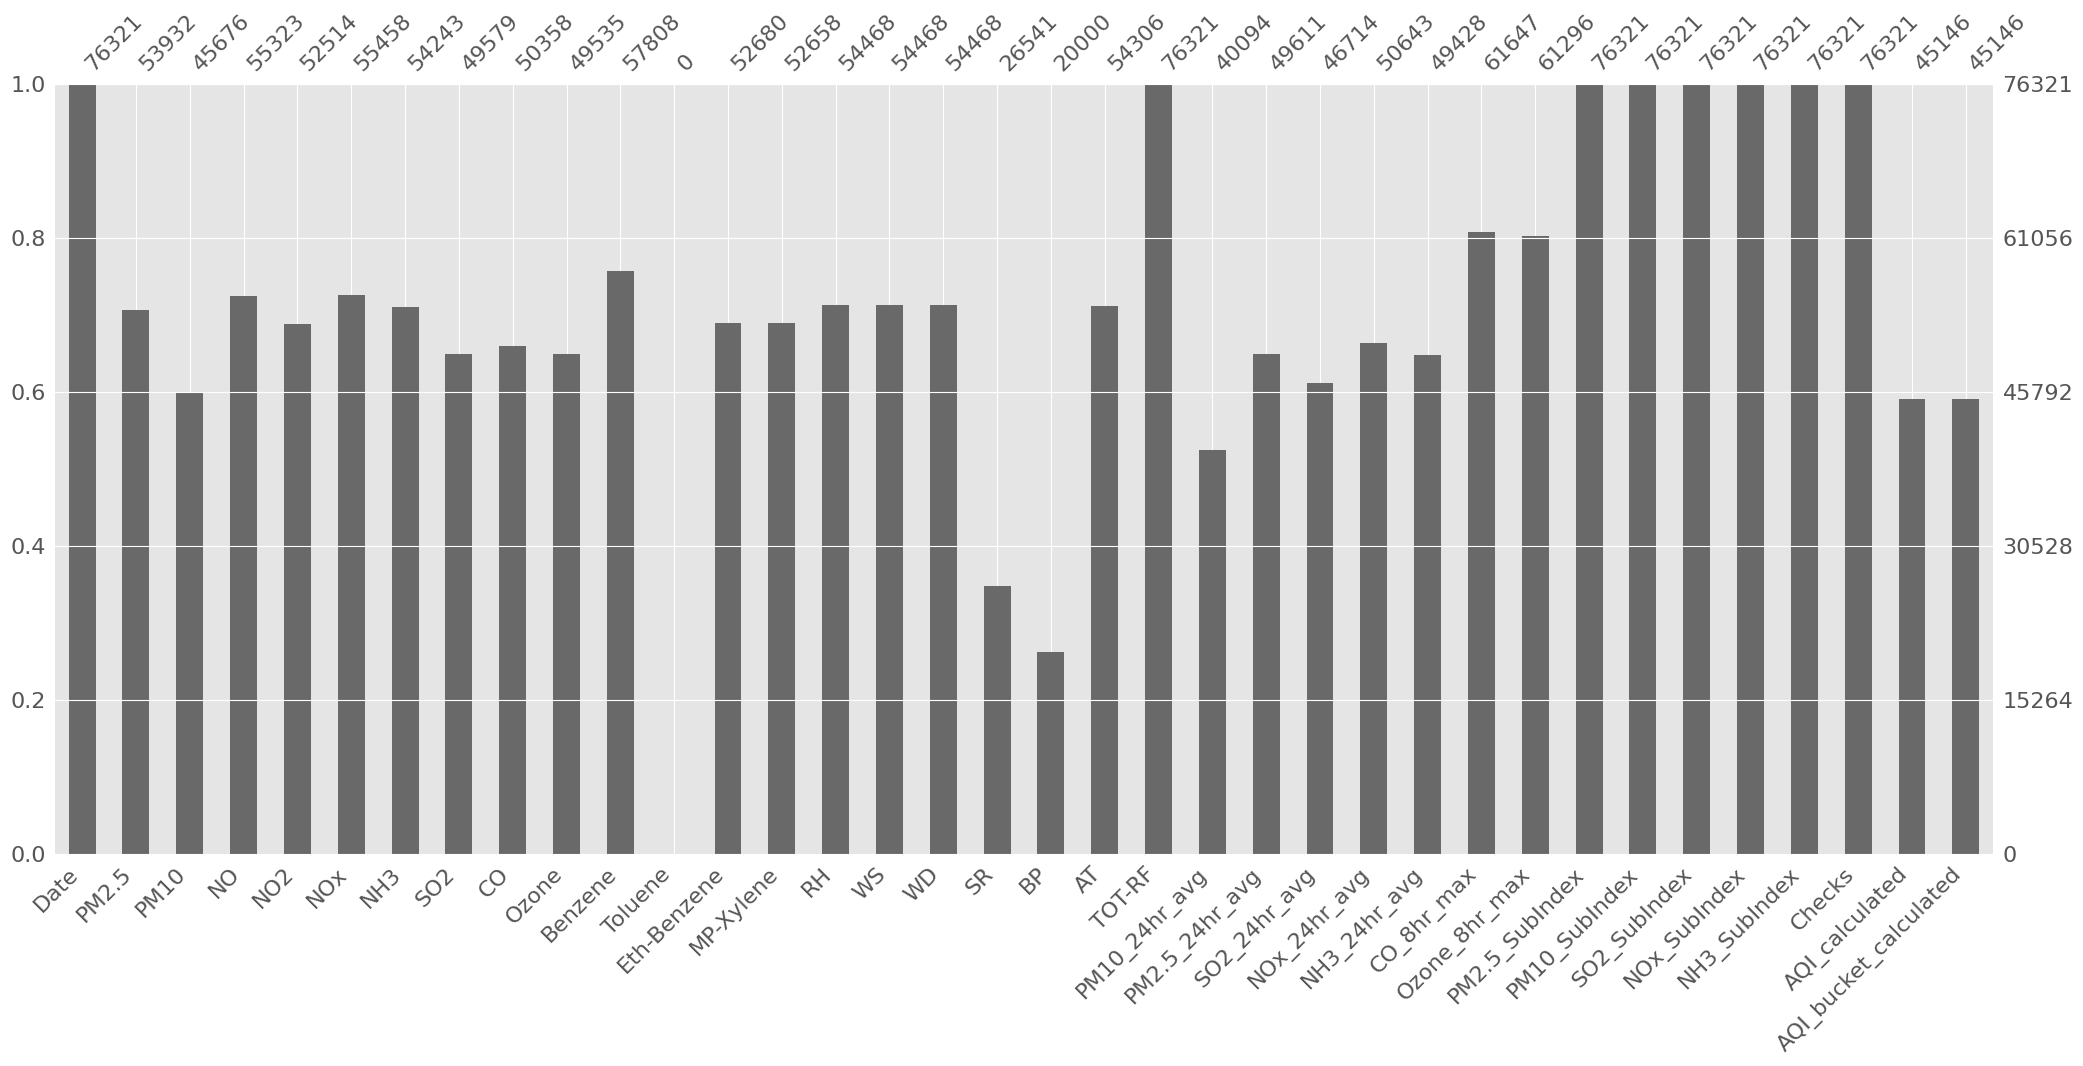

In [87]:
missingno.bar(df)

<Axes: >

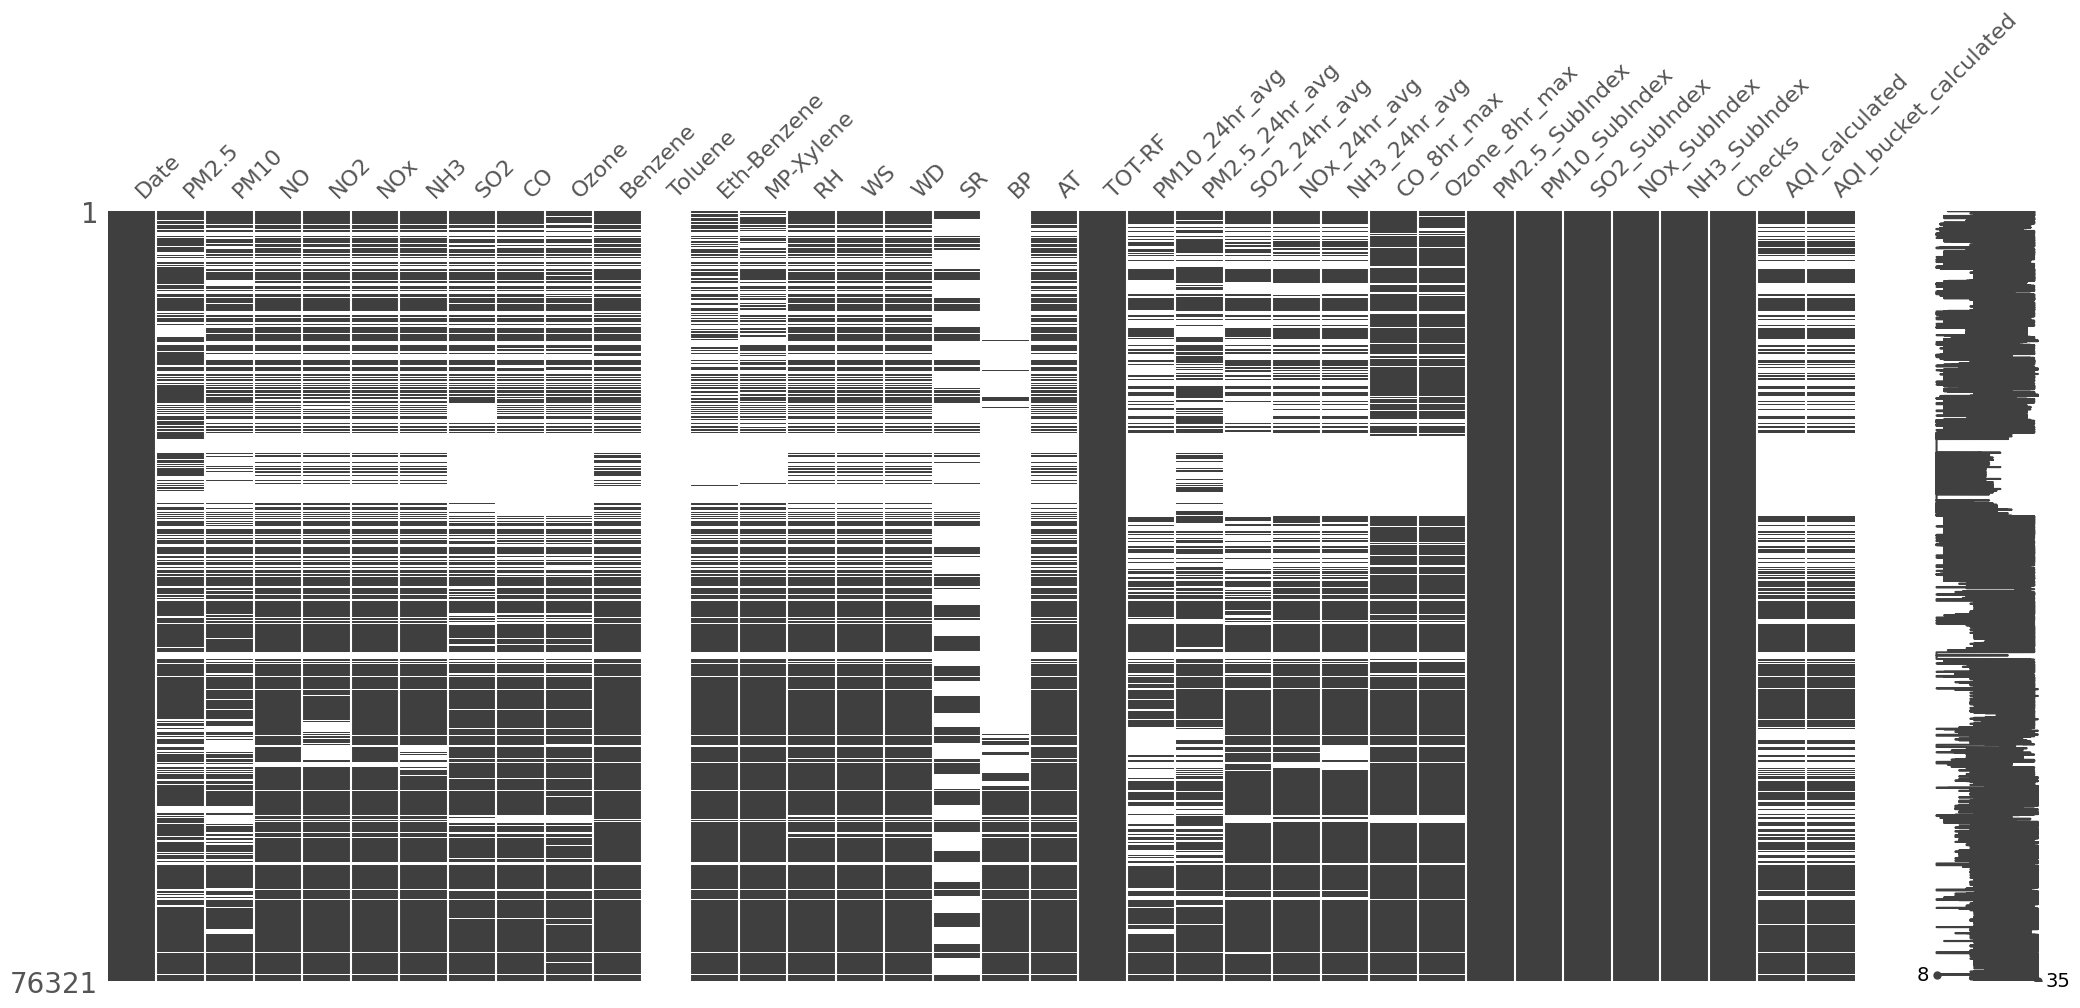

In [88]:
missingno.matrix(df)

<Axes: xlabel='Date'>

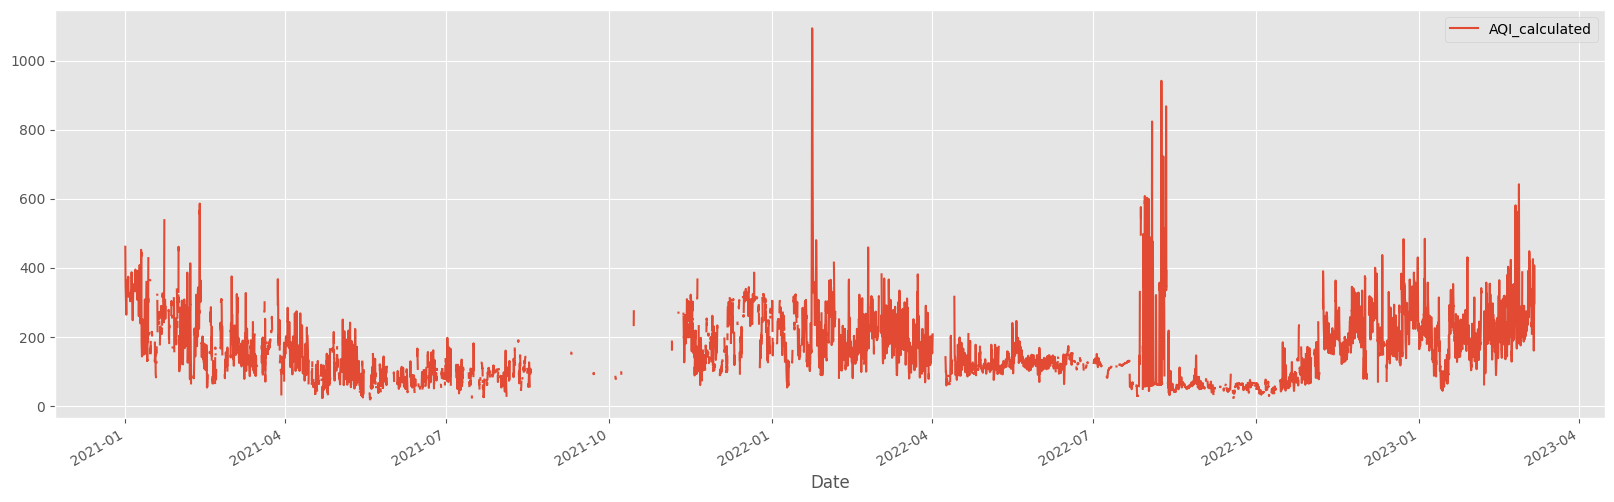

In [89]:
df[['Date', 'AQI_calculated']].set_index('Date').plot()

Seasonal change seen. 
Long sequence of missing values. 

## Malad West Mumbai IITM

In [90]:
df = data_dict['MaladWestMumbaiIITM']

<Axes: >

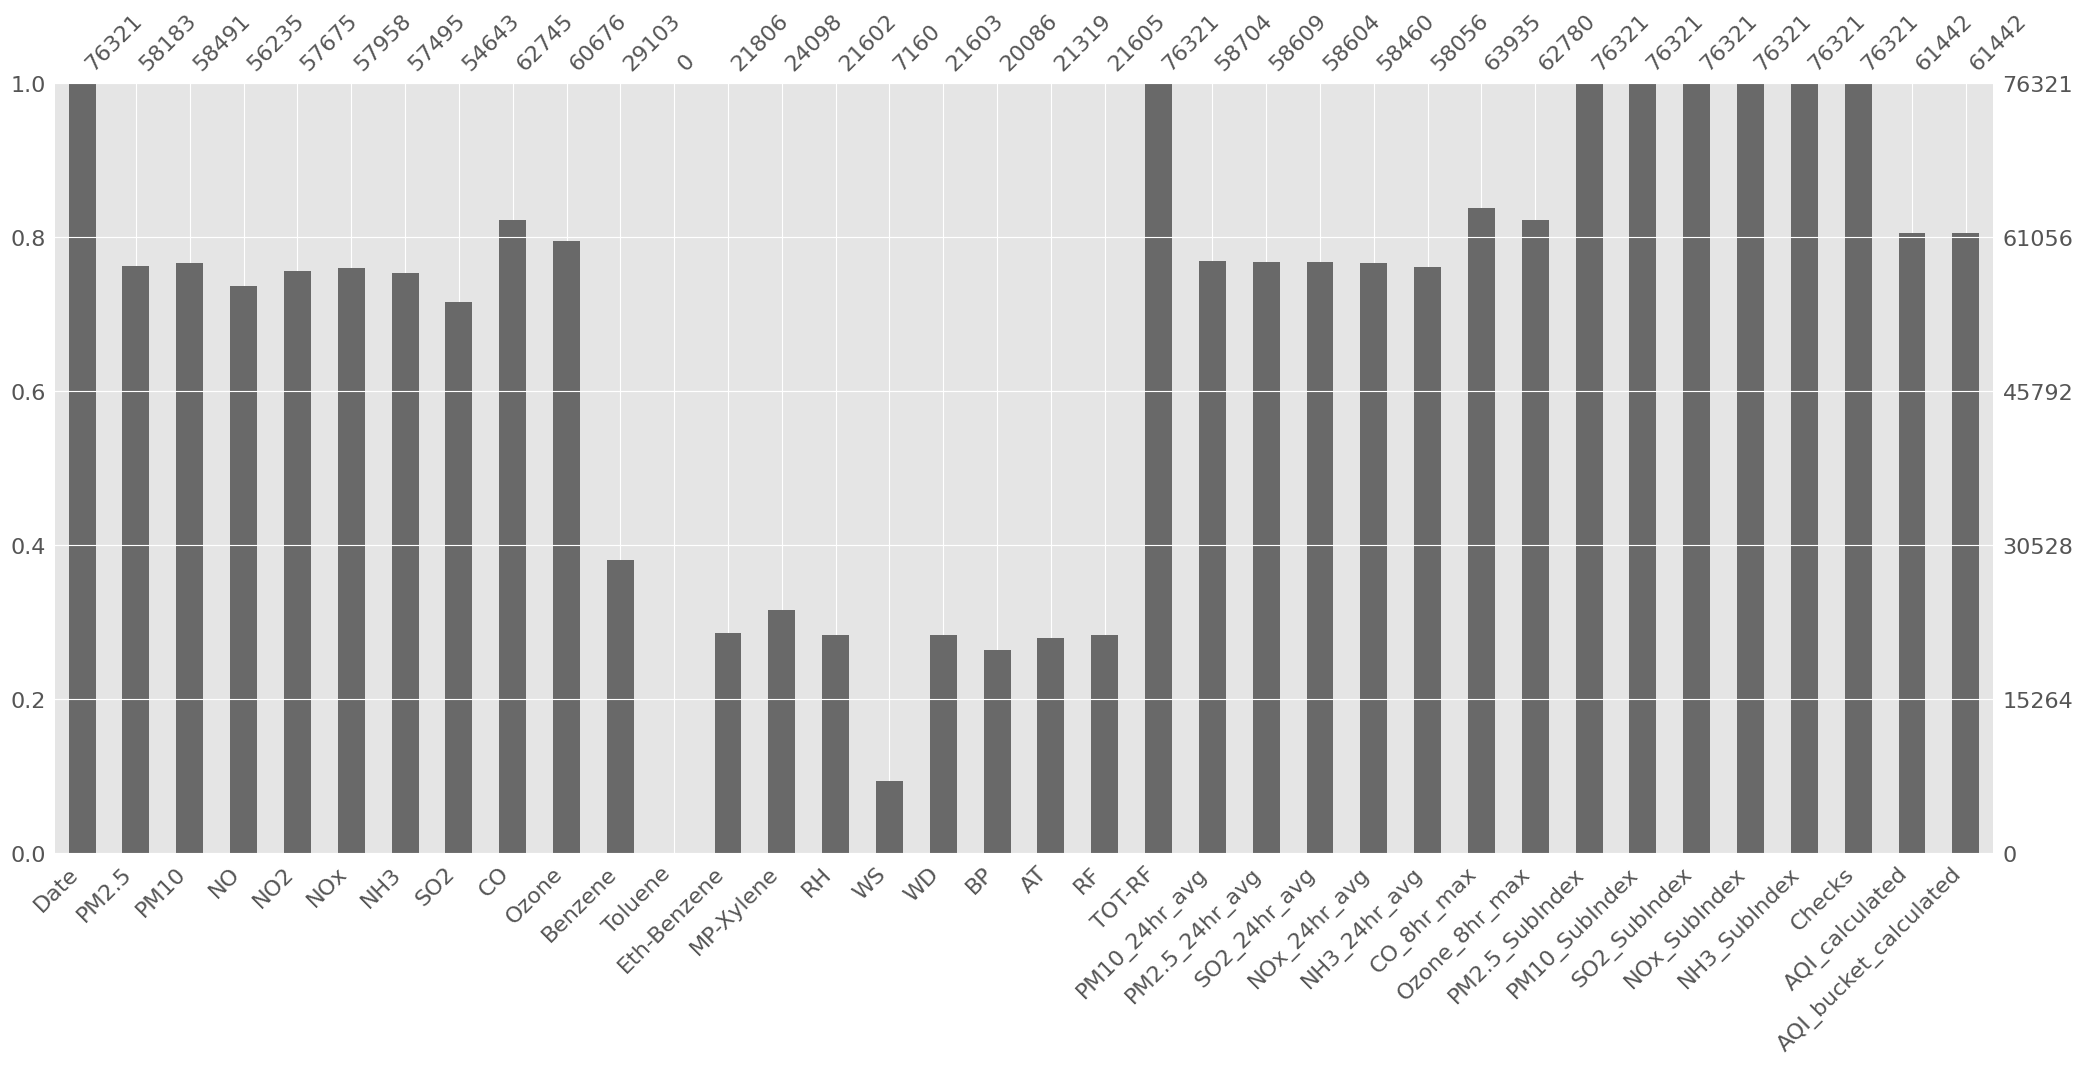

In [91]:
missingno.bar(df)

<Axes: >

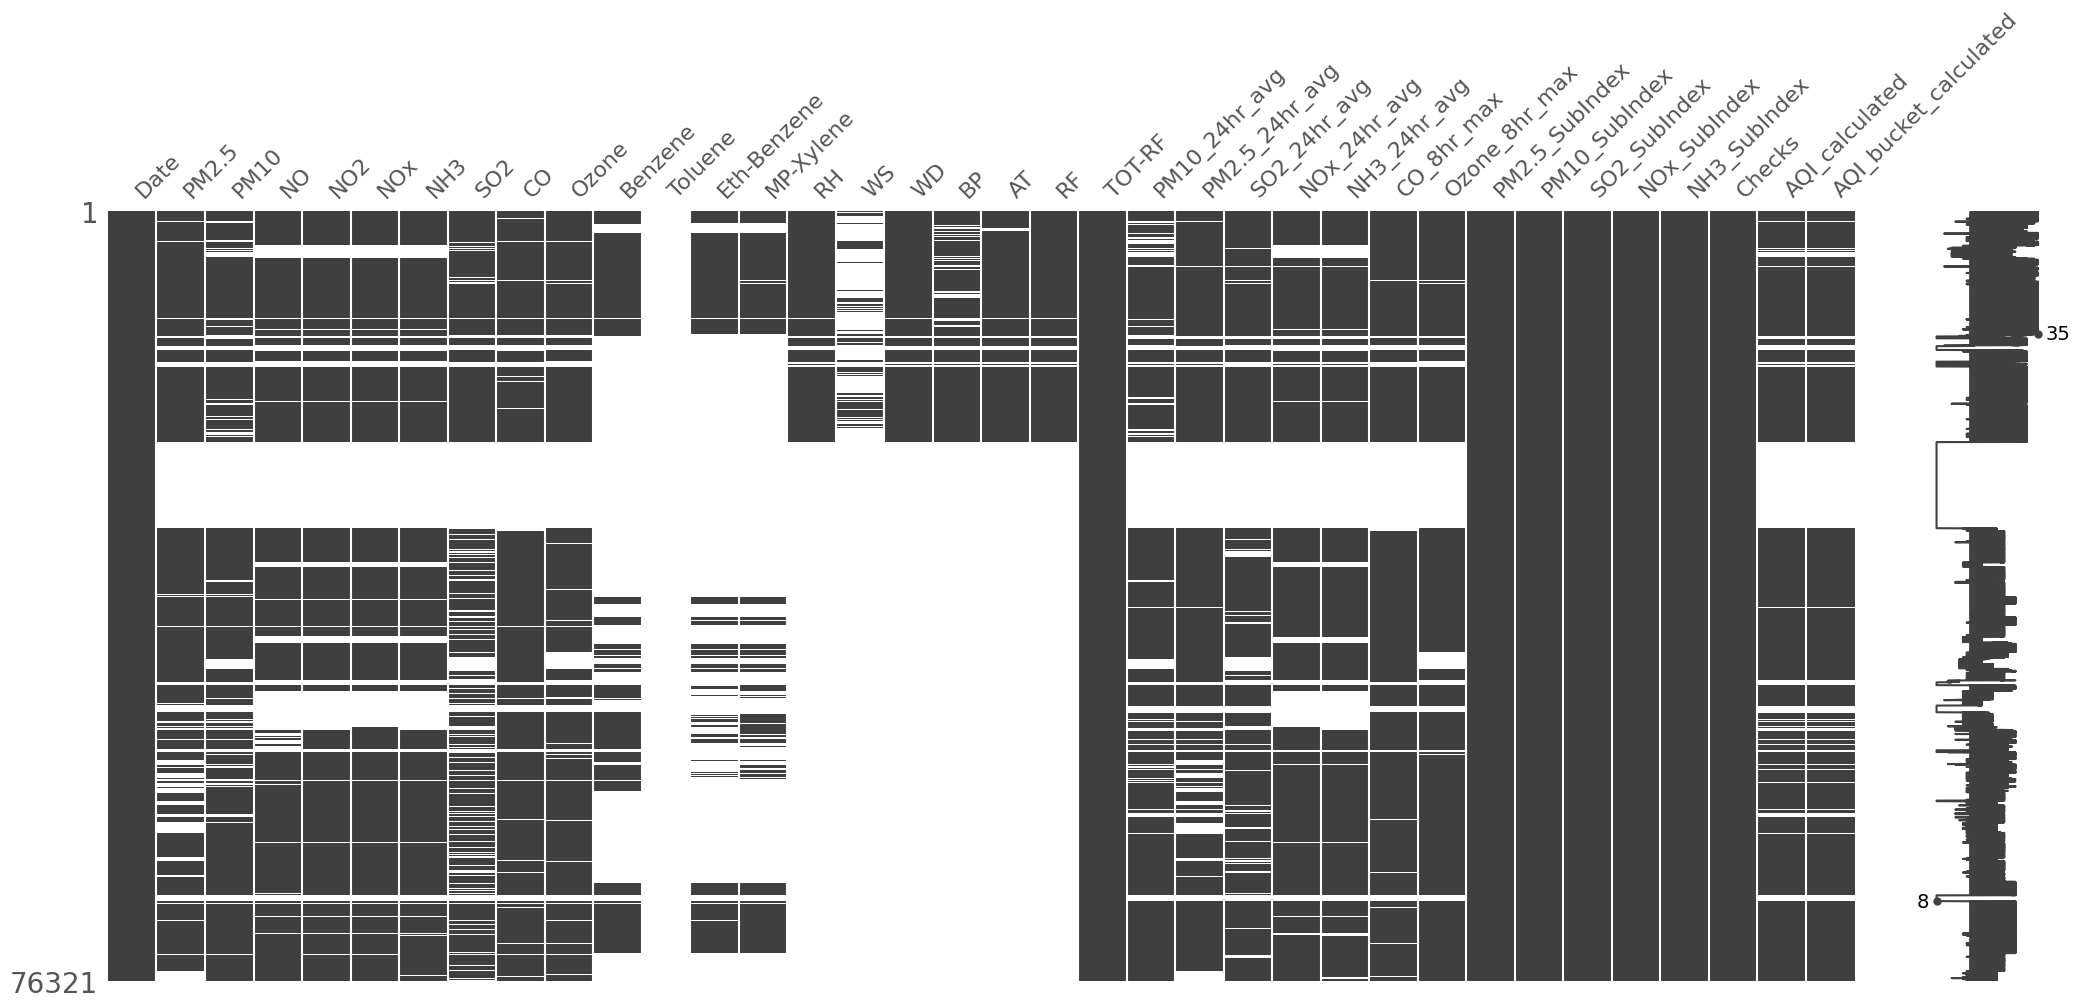

In [92]:
missingno.matrix(df)

<Axes: xlabel='Date'>

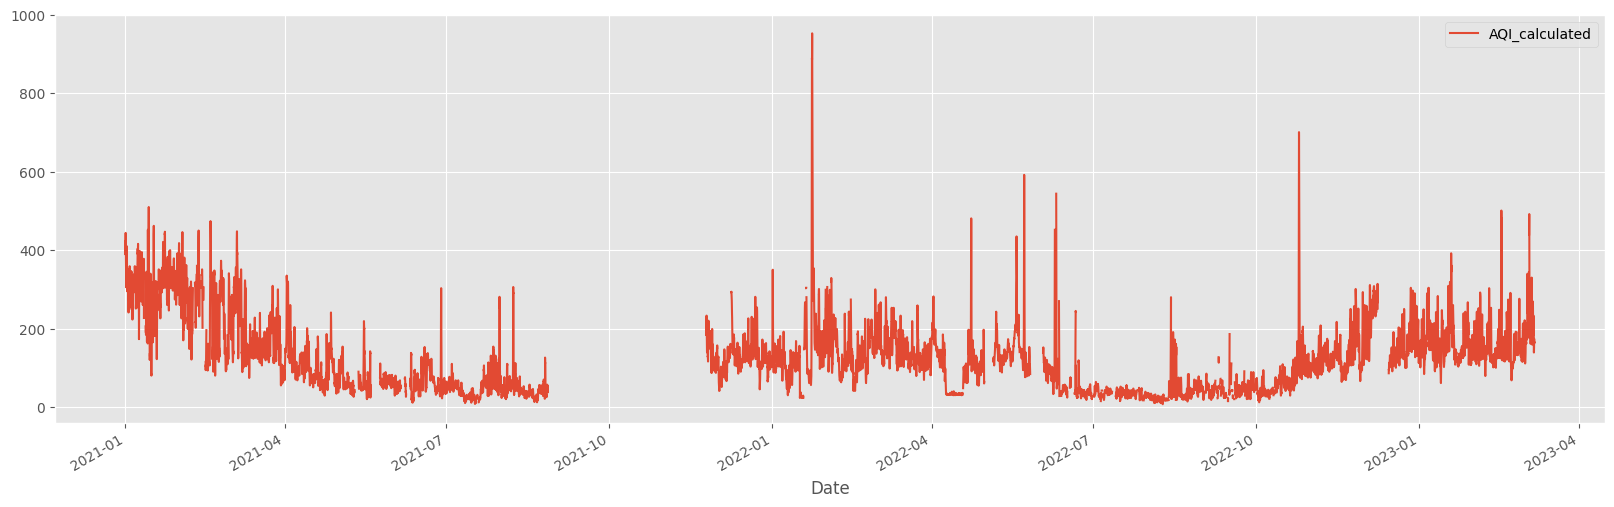

In [93]:
df[['Date', 'AQI_calculated']].set_index('Date').plot()

## Mazgaon Mumbai IITM

In [94]:
df = data_dict['MazgaonMumbaiIITM']

<Axes: >

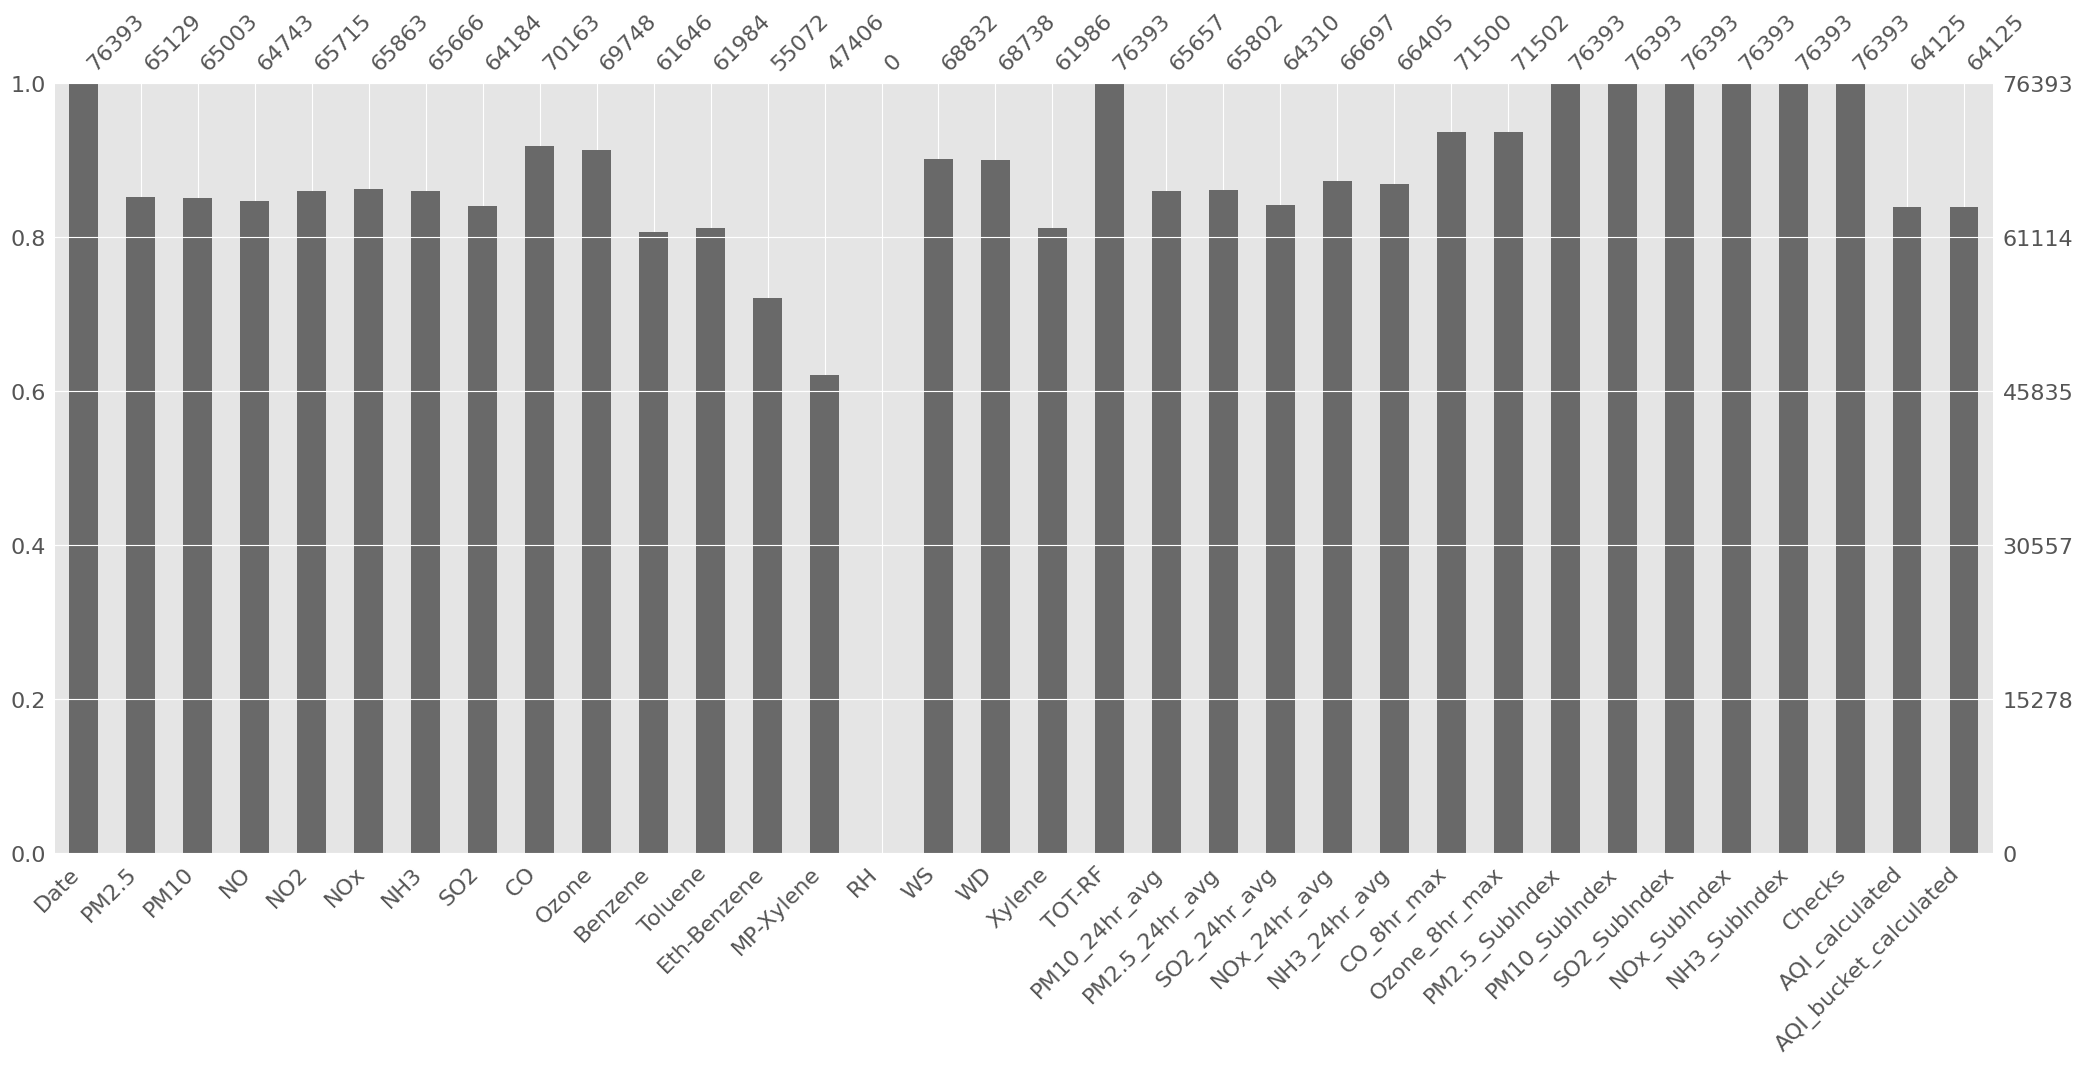

In [95]:
missingno.bar(df)

<Axes: >

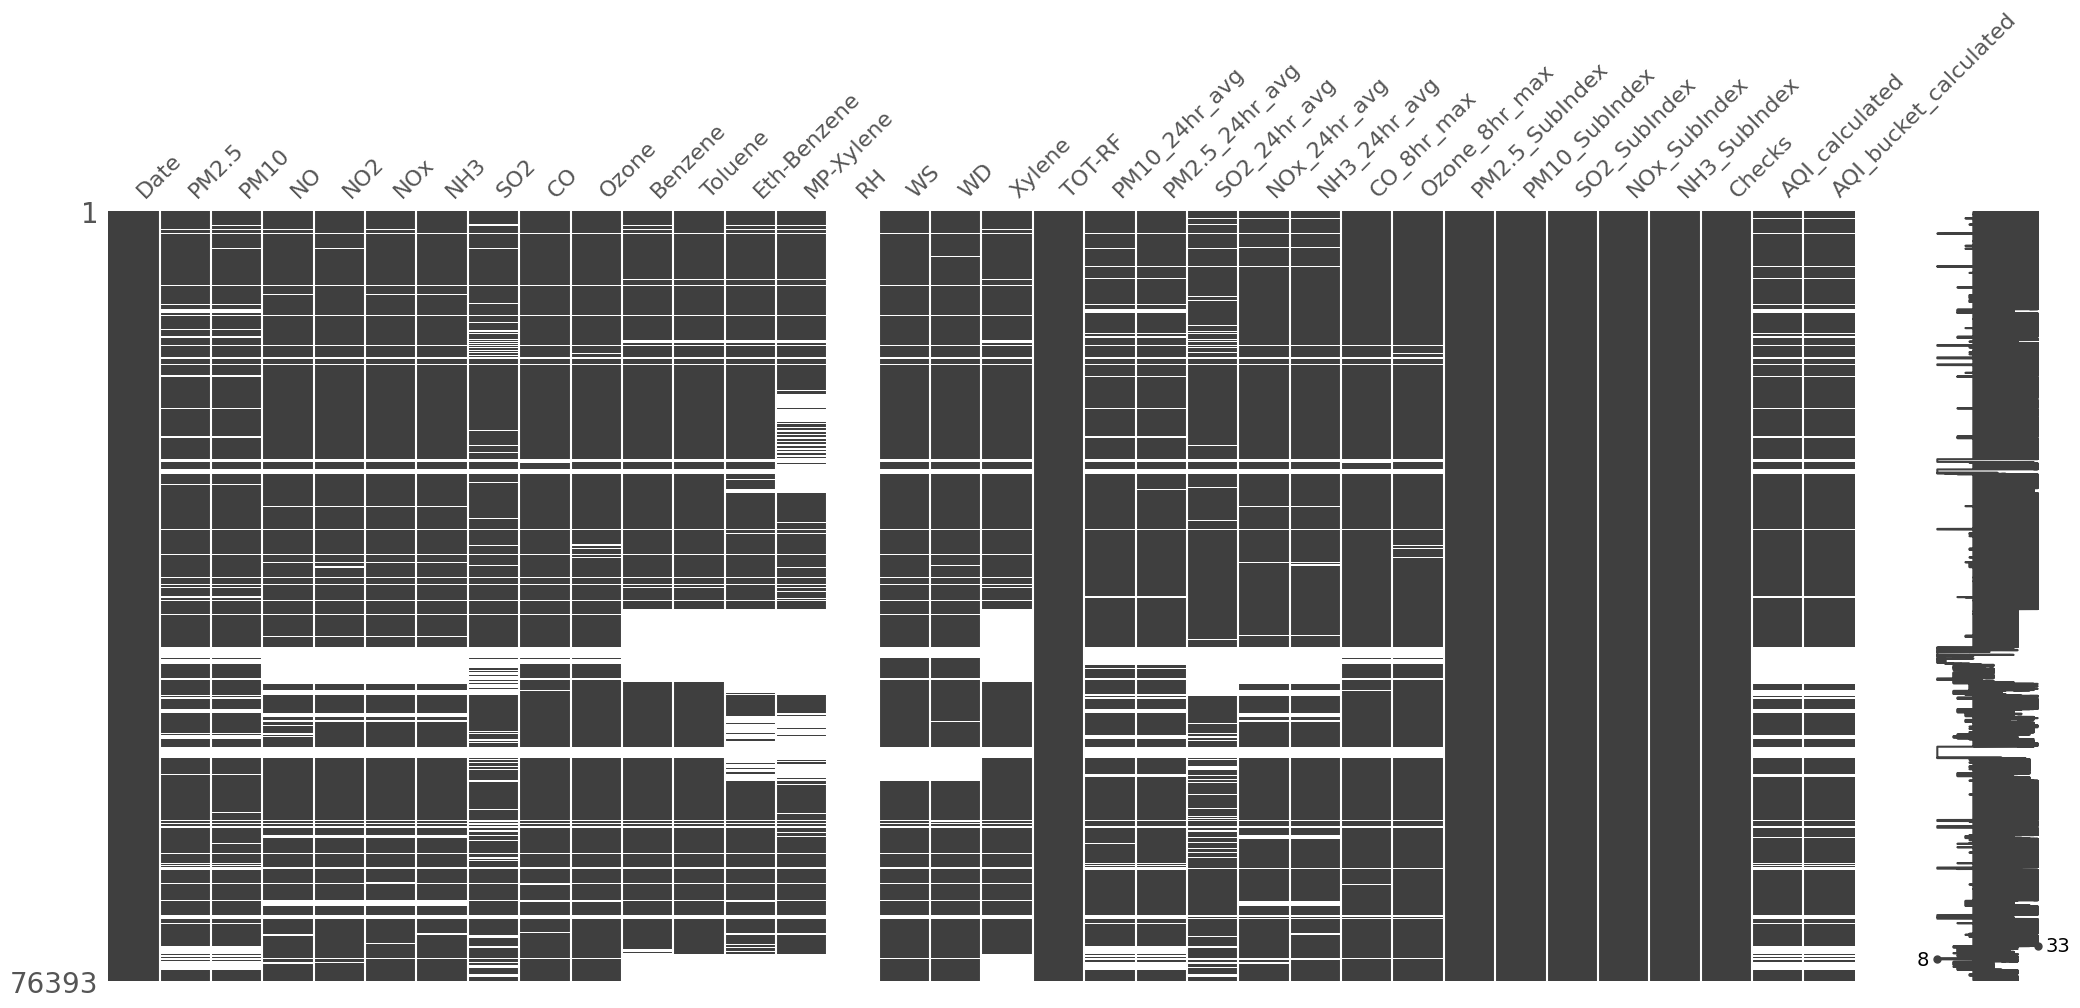

In [96]:
missingno.matrix(df)

<Axes: xlabel='Date'>

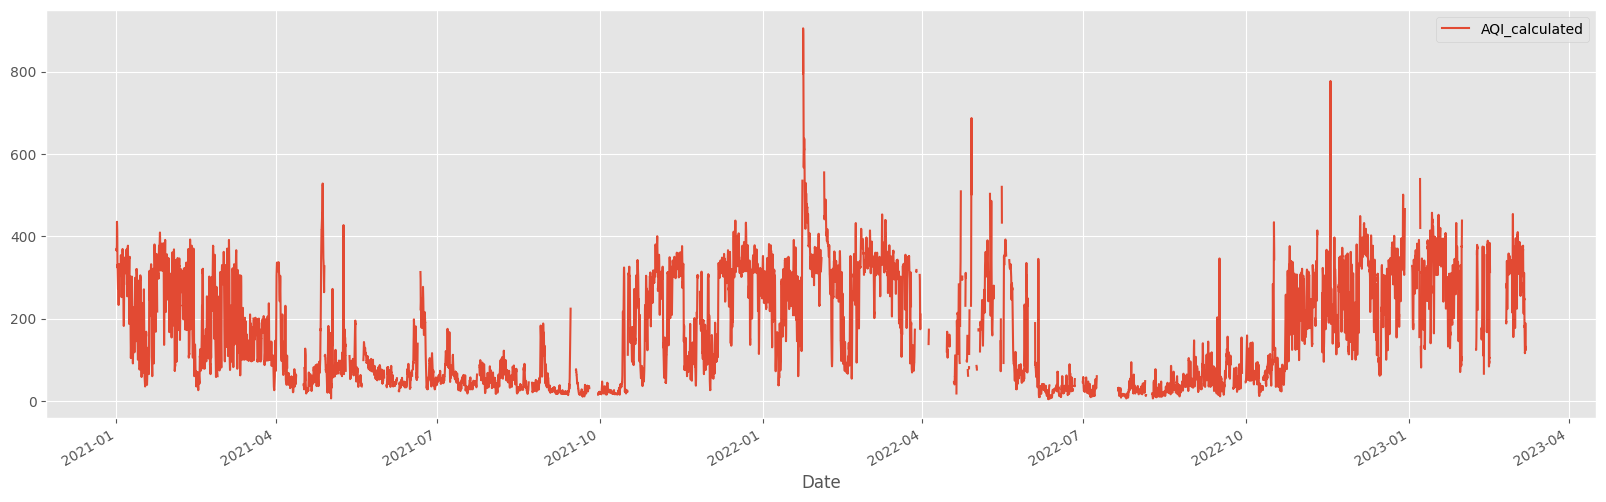

In [97]:
df[['Date', 'AQI_calculated']].set_index('Date').plot()